In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 10.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473097


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835587
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473097


In [6]:
#dropping date and adj close column coz not needed
df = df.drop(['Date','Adj Close'], axis = 1) 
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


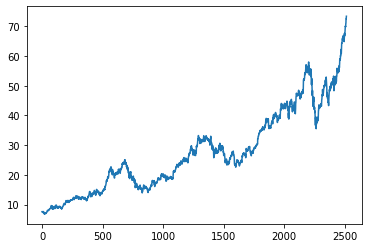

In [7]:
#we are working here only for close column
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
2511,71.222504,70.730003,71.172501,71.067497,48478800.0
2512,72.495003,71.175003,71.205002,72.477501,93121200.0
2513,73.492500,72.029999,72.779999,72.449997,146266000.0
2514,73.172501,71.305000,72.364998,72.879997,144114400.0


In [9]:
#moving average of 100 days
#it will start 101th value since first 100 values are req to find ma
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

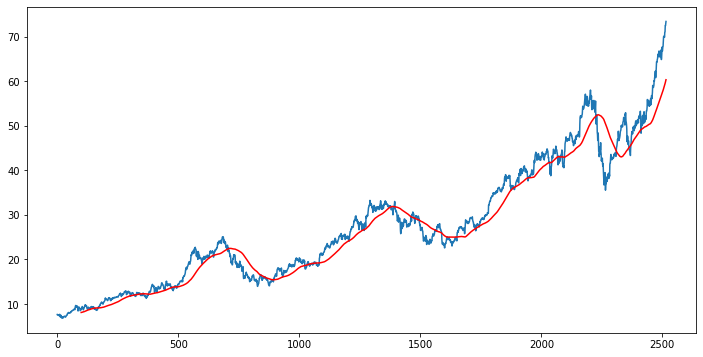

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

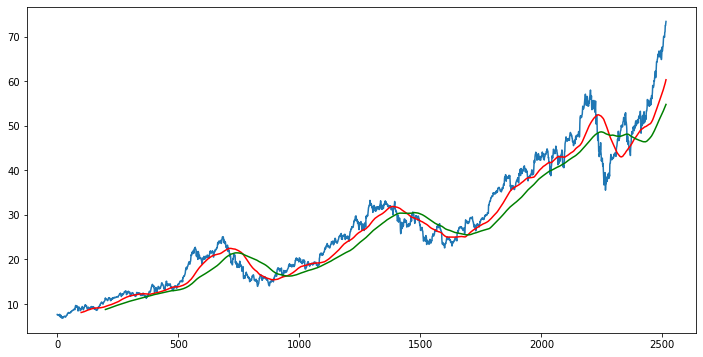

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(2516, 5)

In [14]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)



(1761, 1)
(755, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
#storing data in array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [19]:
data_training_array.shape

(1761, 1)

In [20]:
x_train = [] #first 100 days (feature class)
y_train = []  #101th day(predict result)

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train) , np.array(y_train)
  


In [21]:
# ML MODEL
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu',return_sequences= True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu',return_sequences= True))
               
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 [==============================] - 54s 839ms/step - loss: 0.0627
Epoch 2/50
52/52 [==============================] - 31s 600ms/step - loss: 0.0124
Epoch 3/50
52/52 [==============================] - 32s 610ms/step - loss: 0.0102
Epoch 4/50
52/52 [==============================] - 33s 634ms/step - loss: 0.0099
Epoch 5/50
52/52 [==============================] - 31s 604ms/step - loss: 0.0110
Epoch 6/50
52/52 [==============================] - 31s 596ms/step - loss: 0.0082
Epoch 7/50
52/52 [==============================] - 31s 600ms/step - loss: 0.0076
Epoch 8/50
52/52 [==============================] - 31s 587ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 31s 600ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 31s 602ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 31s 602ms/step - loss: 0.0065
Epoch 12/50
52/52 [==============================] - 31s 592ms/step - loss: 0.0060
Epoch 13/50
5

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [27]:
data_training.tail(100)

,Close
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
1665,27.370001
...,...
1756,29.072500
1757,29.129999
1758,29.315001
1759,29.190001


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df =  past_100_days.append(data_testing,ignore_index=True)

In [30]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [31]:
input_data = scaler.fit_transform(final_df)
input_data #all the rows are scaled now between 0-1

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [32]:
input_data.shape

(855, 1)

In [34]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [35]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [36]:
#making predictions
y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(755, 1)

In [38]:
print(y_test)

[0.06660719 0.06833931 0.06765694 0.07075375 0.07757719 0.08324586
 0.08387573 0.08723495 0.08461056 0.08350831 0.08854715 0.08849465
 0.08739241 0.08854715 0.08896706 0.08838969 0.09841487 0.09872982
 0.09878228 0.09710267 0.09563301 0.13447409 0.13331935 0.1362062
 0.14255719 0.14906573 0.15174258 0.15373715 0.15216249 0.15830357
 0.16738404 0.1699559  0.16911615 0.17105818 0.17620198 0.178354
 0.17530969 0.17599206 0.17740917 0.17772417 0.19242073 0.1880643
 0.19236827 0.19005879 0.19100361 0.18827421 0.18659456 0.18900904
 0.18932396 0.18822176 0.19593749 0.19714469 0.19347055 0.20118628
 0.19268318 0.20097628 0.19835189 0.19688223 0.19814197 0.21346844
 0.21514801 0.21415073 0.21273361 0.21294353 0.21855977 0.21462318
 0.21273361 0.21105396 0.21016167 0.20207857 0.20297085 0.19903426
 0.20312831 0.19982154 0.19709215 0.20633007 0.20543779 0.21262861
 0.21730003 0.21283853 0.2134159  0.21268107 0.22806007 0.23294141
 0.23057947 0.22779762 0.24055223 0.26180977 0.26695365 0.26312197

In [40]:
y_predicted

array([[0.09962524],
       [0.10042433],
       [0.1011561 ],
       [0.10179906],
       [0.10233957],
       [0.10278022],
       [0.10314272],
       [0.10345915],
       [0.10376108],
       [0.10407686],
       [0.10442153],
       [0.10480331],
       [0.10523075],
       [0.10570432],
       [0.10621594],
       [0.10675615],
       [0.10731393],
       [0.1078839 ],
       [0.10847442],
       [0.10909142],
       [0.10973495],
       [0.11039668],
       [0.11109871],
       [0.11190674],
       [0.11287533],
       [0.11405832],
       [0.11550151],
       [0.11723818],
       [0.11928259],
       [0.1216258 ],
       [0.12424409],
       [0.12711743],
       [0.13022731],
       [0.13354543],
       [0.13703477],
       [0.1406601 ],
       [0.14438985],
       [0.14818692],
       [0.15201063],
       [0.15582325],
       [0.15959068],
       [0.16330698],
       [0.1669736 ],
       [0.17059629],
       [0.17417325],
       [0.17769238],
       [0.18113154],
       [0.184

In [41]:
scaler.scale_

array([0.02099517])

In [42]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor 
#giving us a very good trend of apple stock

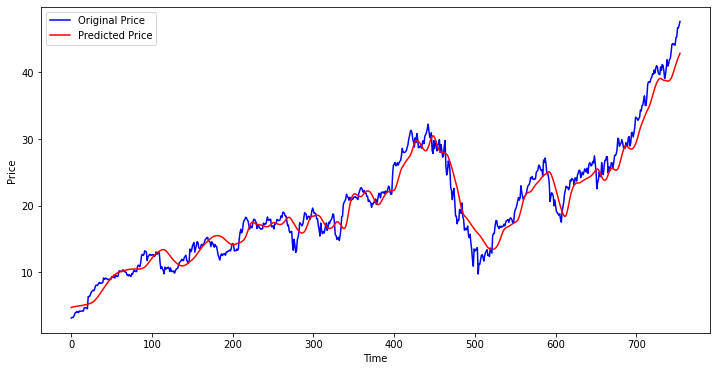

In [43]:

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()